## Initialization

### 초기화 및 모듈 불러오기

In [216]:
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]
del all

In [217]:
import numpy as np
import os, sys
import importlib
import matplotlib.pyplot as plt
sys.path.append("../Assignment_2")
import module_opt
importlib.reload(module_opt)
from module_opt import *
from brequet_range_equation import *

## Assignment\#3(Constrained Optimization) - Problem 2
minimize &nbsp; &nbsp; Roesnbrock Function  
subject to &nbsp; &nbsp; c1 = Line  
or  
subject to &nbsp; &nbsp; c2 = disk

1st Algorithm : QPM(Quadratic Penalty Method)  
2ndd Algorithm : SQP(Sequential Quadratic Programming)

### - Rosenbrock Function

1. Rosenbrock function on a disk  
min &nbsp; $ f(x_1, x_2) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2 $  
s.t. &nbsp; $ c(x_1, x_2) = 1 - x_1^2 - x_2^2 = 0 $

2. Rosenbrock function on straight line  
min &nbsp; $ f(x_1, x_2) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2 $  
s.t. &nbsp; $ c(x_1, x_2) = 1 - x_1 - x_2 = 0 $

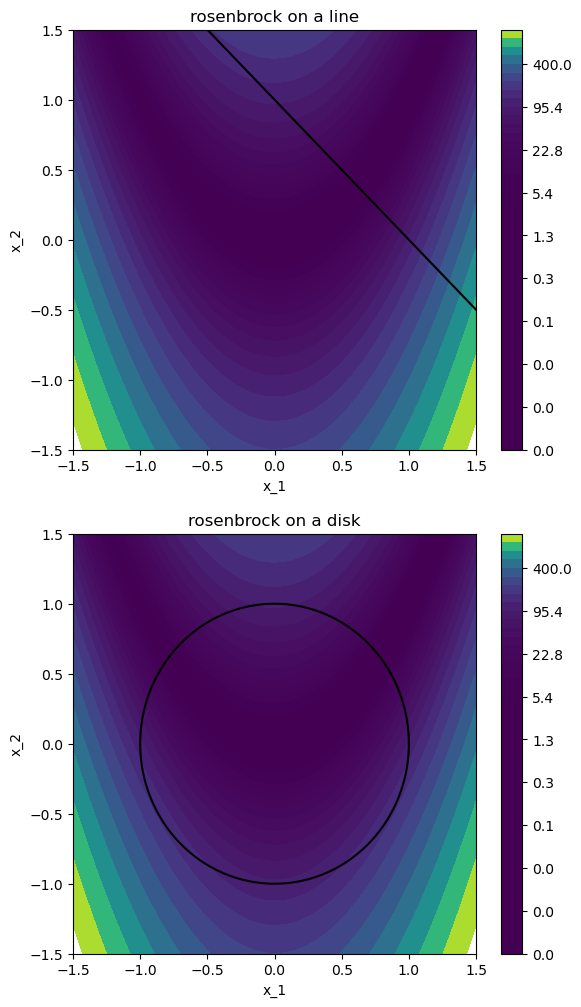

In [218]:
### define functions
f_rosenbrock_eqline = lambda x : (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
c_rosenbrock_eqline = lambda x : 1 - x[0] - x[1]

f_rosenbrock_eqdisk = lambda x : (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
c_rosenbrock_eqdisk = lambda x : 1 - x[0]**2 - x[1]**2

step_rosenbrock_eq = .01
grid_rosenbrock_eq = np.meshgrid(np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq), np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq))
fval_grid_rosenbrock_eq = f_rosenbrock_eqline(grid_rosenbrock_eq)

### plot functions
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6.5, 6*2))

contour_0 = axes[0].contourf(grid_rosenbrock_eq[0], grid_rosenbrock_eq[1], fval_grid_rosenbrock_eq, levels=np.logspace(-3, 3.1))
x_line_eq = np.arange(-0.5, 1.5+.01, .01); y_line_eq = 1 - x_line_eq
axes[0].plot(x_line_eq, y_line_eq, 'k')
axes[0].set_xlabel('x_1'); axes[0].set_ylabel('x_2'); axes[0].set_title('rosenbrock on a line')
fig.colorbar(contour_0, ax=axes[0])

contour_1 = axes[1].contourf(grid_rosenbrock_eq[0], grid_rosenbrock_eq[1], fval_grid_rosenbrock_eq, levels=np.logspace(-3, 3.1))
x_disk_eq = np.arange(-1.0, 1+.0001, .0001); y_disk_eq_pos = (1 - x_disk_eq**2)**.5; y_disk_eq_neg = -(1 - x_disk_eq**2)**.5
axes[1].plot(x_disk_eq, y_disk_eq_pos, 'k') 
axes[1].plot(x_disk_eq, y_disk_eq_neg, 'k')
axes[1].set_xlabel('x_1'); axes[1].set_ylabel('x_2'); axes[1].set_title('rosenbrock on a disk')
fig.colorbar(contour_1, ax=axes[1])


In [219]:
f1 = f_rosenbrock_eqline # objective function
ce_1 = [c_rosenbrock_eqline] # equality constraints
ci_1 = [] # inequality constraints
x0_1 = np.array([-.5, -.5])

f2 = f_rosenbrock_eqdisk # objective function
ce_2 = [c_rosenbrock_eqdisk] # equality constraints
ci_2 = [] # inequality constraints
x0_2 = np.array([0, 0])

### - Solve Rosenbrock with Line Constraint using SQP, QPM

In [220]:
result1_qpm = qpm(f=f1, ce=ce_1, ci=ci_1, x0=x0_1, inner_opt=3, tol=1e-4) # inner_opt -> 0:stp_descent 1:cg_hs 2:cg_fr 3:quasi_newton_bfgs

mu_0 = 1
tau_0 = 0.2
Since ||grad(x0)|| = 217.0921463262293 > 0.2, x0 : [-0.5 -0.5] is not an optimum point. Optimization begins !
BFGS
x_1 : [1.05 1.02]
f_1 : 1.255574997820803
‖∇f(x_1)‖ : 39.00201655210813
‖∆x_1‖ : 2.1709214632622933
recent alpha : 0.010000000000000002
recent p : [154.99999999 152.        ]

BFGS
x_2 : [1.00840612 1.07762812]
f_2 : 0.9588041209767206
‖∇f(x_2)‖ : 26.88315110075506
‖∆x_2‖ : 0.07107075206140331
recent alpha : 0.0020791192395972252
recent p : [-20.00553052  27.71756558]

BFGS
x_3 : [1.017092   1.03501128]
f_3 : 0.5537814287321259
‖∇f(x_3)‖ : 1.448448150592046
‖∆x_3‖ : 0.04349298705873898
recent alpha : 1
recent p : [ 0.00868588 -0.04261684]

BFGS
x_4 : [1.00994053 1.01717362]
f_4 : 0.5283680557403723
‖∇f(x_4)‖ : 2.229860859099647
‖∆x_4‖ : 0.019217846264871878
recent alpha : 1
recent p : [-0.00715147 -0.01783766]

BFGS
x_5 : [0.89968794 0.77402769]
f_5 : 0.3624006547326546
‖∇f(x_5)‖ : 14.688240119492827
‖∆x_5‖ : 0.2669748609423305
recent alpha : 1
recent 

In [221]:
result1_sqp = sqp(f=f1, ce=ce_1, ci=ci_1, x0=x0_1, inner_opt=3, tol=1e-6, tol_inter=1e-4) # inner_opt -> 0:stp_descent 1:cg_hs 2:cg_fr 3:quasi_newton_bfgs


 log - SQP
‖∆x‖ = 6.37e-01, x01 = [0.12500000, -0.62500000] | f = 4.1806e+01, ‖∇L‖ = 1.82e+02, ‖ce‖∞ = 1.50e+00, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 1.51e+02, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 1.27e+00, x02 = [-0.31295663, 0.56295701] | f = 2.3348e+01, ‖∇L‖ = 3.14e+02, ‖ce‖∞ = 7.50e-01, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 1.47e+02, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 1.08e+00, x03 = [0.72498025, 0.27501970] | f = 6.3545e+00, ‖∇L‖ = 1.15e+02, ‖ce‖∞ = 5.09e-08, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 6.50e+01, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 1.67e-01, x04 = [0.60657233, 0.39342767] | f = 2.1980e-01, ‖∇L‖ = 9.88e+01, ‖ce‖∞ = 6.04e-09, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 6.86e+01, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 1.51e-02, x05 = [0.61721626, 0.38278365] | f = 1.4686e-01, ‖∇L‖ = 1.37e+00, ‖ce‖∞ = 8.89e-08, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 1.36e-01, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆x‖ = 2.27e-03, x06 = [0.61882162, 0.38117786] | f = 1.4561e-01, ‖∇L‖ = 2.27e-02, ‖ce‖∞ = 5.22e-07, ‖ci‖∞ = 0.00e+00, ‖λ‖ = 3.49e-01, ‖ν‖ = 0.00e+00 


 log - SQP
‖∆

#### - Plot Convergence log of QPM, SQP for rosenbrock function with line equality constraint

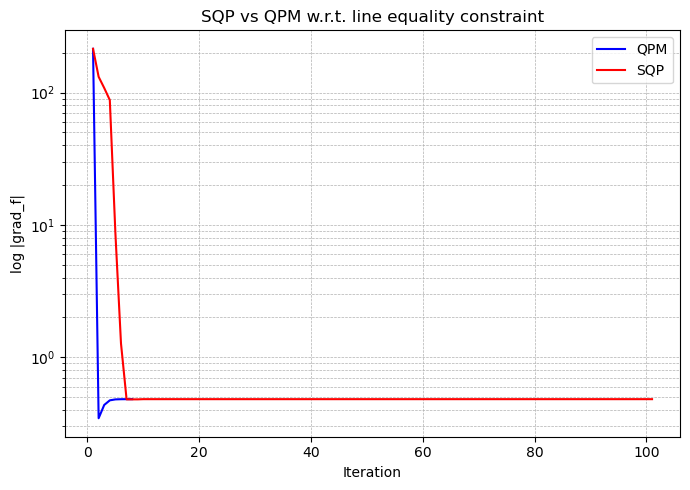

In [222]:
grad_f_qpm_eqline = result1_qpm[2]
grad_f_sqp_eqline = result1_sqp[2]

# grad_f_sqp_eqline, grad_f_qpm_eqline : shape (n, 2)
# 각 iteration마다 gradient의 norm 계산
norm_qpm = np.linalg.norm(grad_f_qpm_eqline, axis=1)
norm_sqp = np.linalg.norm(grad_f_sqp_eqline, axis=1)

# x축 (iteration index)
iterations_qpm = np.arange(1, len(norm_qpm) + 1)
iterations_sqp = np.arange(1, len(norm_sqp) + 1)

# 그래프 그리기
plt.figure(figsize=(7,5))
plt.plot(iterations_qpm, norm_qpm, 'b-', label='QPM')
plt.plot(iterations_sqp, norm_sqp, 'r-', label='SQP')
plt.yscale('log')  # y축 로그 스케일

# 레이블, 제목, 범례
plt.xlabel('Iteration')
plt.ylabel('log |grad_f|')
plt.title('SQP vs QPM w.r.t. line equality constraint')
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

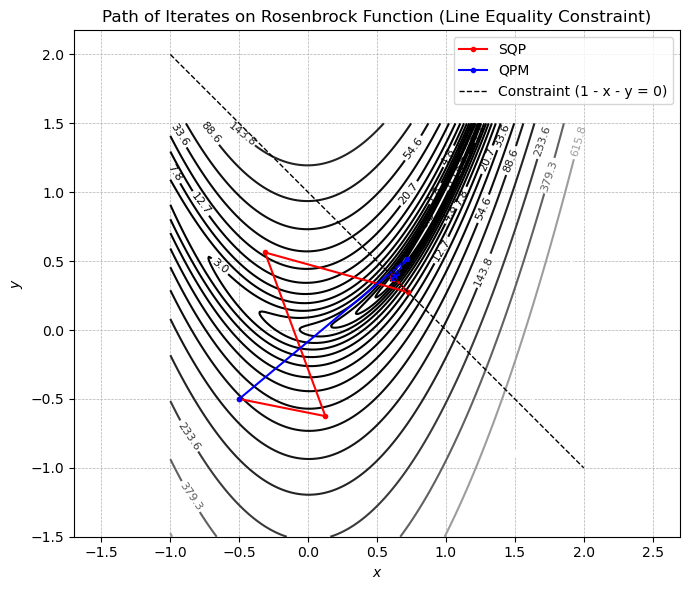

In [223]:
### define functions
f_rosenbrock_eqline = lambda x : (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
c_rosenbrock_eqline = lambda x : 1 - x[0] - x[1]

f_rosenbrock_eqdisk = lambda x : (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
c_rosenbrock_eqdisk = lambda x : 1 - x[0]**2 - x[1]**2

### grid and f value
step_rosenbrock_eq = .01
grid_rosenbrock_eq = np.meshgrid(np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq), np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq))
fval_grid_rosenbrock_eq = f_rosenbrock_eqline(grid_rosenbrock_eq)

### log of x of each method
x_sqp_eqline = result1_sqp[0]
x_qpm_eqline = result1_qpm[0]

# === Rosenbrock function (line equality constraint) ===
f_rosenbrock_eqline = lambda x, y: (1 - x)**2 + 100*(y - x**2)**2

# === Grid in the desired range ===
step_rosenbrock_eq = 0.01
xg, yg = np.meshgrid(
    np.arange(-1, 2 + step_rosenbrock_eq, step_rosenbrock_eq),
    np.arange(-1.5, 1.5 + step_rosenbrock_eq, step_rosenbrock_eq)
)
fval_grid_rosenbrock_eq = f_rosenbrock_eqline(xg, yg)

# === Extract paths ===
x_sqp_eqline = np.array(x_sqp_eqline)  # (n, 2)
x_qpm_eqline = np.array(x_qpm_eqline)  # (n, 2)

# === Plot contour and paths ===
plt.figure(figsize=(7,6))
contours = plt.contour(
    xg, yg, fval_grid_rosenbrock_eq,
    levels=np.logspace(-1, 3, 20), cmap='gray'
)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.1f")

# SQP path (red)
plt.plot(x_sqp_eqline[:,0], x_sqp_eqline[:,1], 'r-o', label='SQP', markersize=3)
# QPM path (blue)
plt.plot(x_qpm_eqline[:,0], x_qpm_eqline[:,1], 'b-o', label='QPM', markersize=3)

# Constraint line c1(x,y)=1-x-y=0
xx = np.linspace(-1, 2, 300)
plt.plot(xx, 1 - xx, 'k--', lw=1, label='Constraint (1 - x - y = 0)')

# === Scope ===
plt.xlim([-1, 2])
plt.ylim([-1.5, 1.5])

# === Labels and formatting ===
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Path of Iterates on Rosenbrock Function (Line Equality Constraint)')
plt.legend()
plt.grid(True, ls='--', lw=0.5)
plt.axis('equal')
plt.tight_layout()
plt.show()

### - Solve Rosenbrock with Disk Constraint using SQP, QPM

In [224]:
result2_qpm = qpm(f=f2, ce=ce_2, ci=ci_2, x0=x0_2, inner_opt=3, tol=1e-4) # inner_opt -> 0:stp_descent 1:cg_hs 2:cg_fr 3:quasi_newton_bfgs

mu_0 = 1
tau_0 = 0.2
Since ||grad(x0)|| = 1.999999999946489 > 0.2, x0 : [0 0] is not an optimum point. Optimization begins !
BFGS
x_1 : [0.2 0. ]
f_1 : 1.2607999999934931
‖∇f(x_1)‖ : 8.091888283477227
‖∆x_1‖ : 0.1999999999946489
recent alpha : 0.1
recent p : [2. 0.]

BFGS
x_2 : [0.32300309 0.04975124]
f_2 : 1.155117371310127
‖∇f(x_2)‖ : 12.13789412734494
‖∆x_2‖ : 0.13268363648162596
recent alpha : 0.010000000000000002
recent p : [12.3003094   4.97512438]

BFGS
x_3 : [0.40939926 0.18943447]
f_3 : 0.7136613536999901
‖∇f(x_3)‖ : 6.764319608731561
‖∆x_3‖ : 0.16424281642052582
recent alpha : 1
recent p : [0.08639617 0.13968323]

BFGS
x_4 : [0.55972704 0.28949901]
f_4 : 0.4322039030137197
‖∇f(x_4)‖ : 6.3499504965767395
‖∆x_4‖ : 0.1805861305487888
recent alpha : 0.7460815213144408
recent p : [0.20148974 0.13412011]

BFGS
x_5 : [0.60999672 0.34590869]
f_5 : 0.34983972297358323
‖∇f(x_5)‖ : 7.492257251756405
‖∆x_5‖ : 0.07555853899739214
recent alpha : 1
recent p : [0.05026968 0.05640968]

BFGS
x

In [241]:
x0_2 = np.array([-.5, -1])
# result2_sqp = sqp(f=f2, ce=ce_2, ci=ci_2, x0=x0_2, inner_opt=3, tol=1e-6, tol_inter=1e-4) # inner_opt -> 0:stp_descent 1:cg_hs 2:cg_fr 3:quasi_newton_bfgs
result2_sqp = alm(f=f2, ce=ce_2, ci=ci_2, x0=x0_2, inner_opt=3, tol=1e-6) # inner_opt -> 0:stp_descent 1:cg_hs 2:cg_fr 3:quasi_newton_bfgs

mu_0 = 1
rho_0 = 1
tau_0 = 0.01
Since ||grad(x0)|| = 356.2103486755724 > 0.01, x0 : [-0.5 -1. ] is not an optimum point. Optimization begins !
BFGS
x_1 : [1.3461925 0.826145 ]
f_1 : 98.47418804780773
‖∇f(x_1)‖ : 570.0041610451917
‖∆x_1‖ : 2.5967734418449235
recent alpha : 0.007290000000000001
recent p : [253.25       250.50000001]

BFGS
x_2 : [1.24452041 2.22530933]
f_2 : 60.951656115954165
‖∇f(x_2)‖ : 359.977683975218
‖∆x_2‖ : 1.4028535347723536
recent alpha : 0.0034867844010000007
recent p : [-29.15927013 401.27641132]

BFGS
x_3 : [1.17215278 1.32702821]
f_3 : 2.528725544787155
‖∇f(x_3)‖ : 27.596791750813672
‖∆x_3‖ : 0.9011914597264059
recent alpha : 1
recent p : [-0.07236763 -0.89828112]

BFGS
x_4 : [1.13729999 1.26074965]
f_4 : 1.8985240784071626
‖∇f(x_4)‖ : 19.51664130650124
‖∆x_4‖ : 0.07488367697813147
recent alpha : 1
recent p : [-0.0348528  -0.06627856]

BFGS
x_5 : [0.99393797 0.96156549]
f_5 : 0.48580135399972685
‖∇f(x_5)‖ : 12.769998393517199
‖∆x_5‖ : 0.33175869120512436
rece

#### - Plot Convergence log of QPM, SQP for rosenbrock function with disk equality constraint

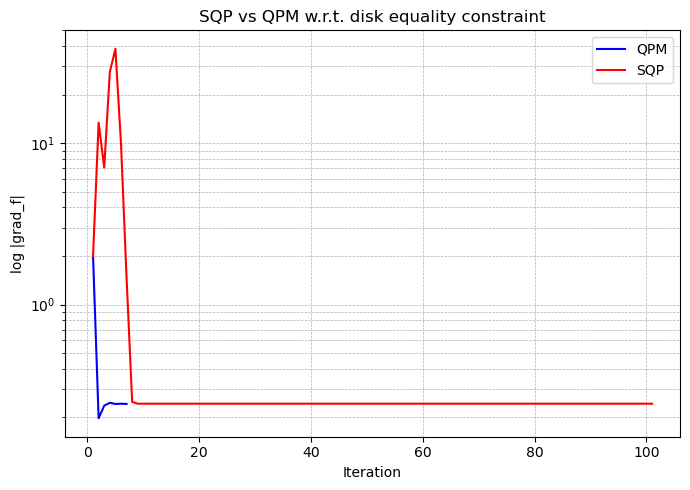

In [226]:
grad_f_qpm_eqdisk = result2_qpm[2]
grad_f_sqp_eqdisk = result2_sqp[2]

# grad_f_sqp_eqdisk, grad_f_qpm_eqdisk : shape (n, 2)
# 각 iteration마다 gradient의 norm 계산
norm_qpm = np.linalg.norm(grad_f_qpm_eqdisk, axis=1)
norm_sqp = np.linalg.norm(grad_f_sqp_eqdisk, axis=1)

# x축 (iteration index)
iterations_qpm = np.arange(1, len(norm_qpm) + 1)
iterations_sqp = np.arange(1, len(norm_sqp) + 1)

# 그래프 그리기
plt.figure(figsize=(7,5))
plt.plot(iterations_qpm, norm_qpm, 'b-', label='QPM')
plt.plot(iterations_sqp, norm_sqp, 'r-', label='SQP')
plt.yscale('log')  # y축 로그 스케일

# 레이블, 제목, 범례
plt.xlabel('Iteration')
plt.ylabel('log |grad_f|')
plt.title('SQP vs QPM w.r.t. disk equality constraint')
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

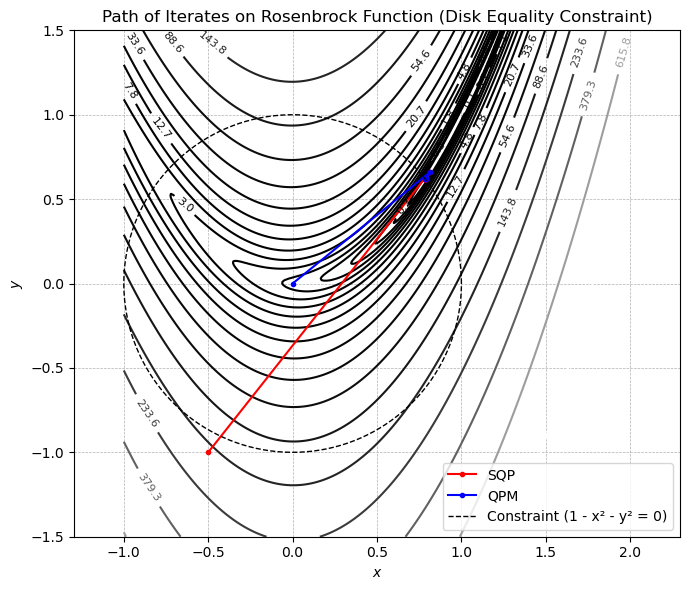

In [242]:
### define functions
f_rosenbrock_eqline = lambda x : (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
c_rosenbrock_eqline = lambda x : 1 - x[0] - x[1]

f_rosenbrock_eqdisk = lambda x : (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
c_rosenbrock_eqdisk = lambda x : 1 - x[0]**2 - x[1]**2

### grid and f value
step_rosenbrock_eq = .01
grid_rosenbrock_eq = np.meshgrid(np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq), np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq))
fval_grid_rosenbrock_eq = f_rosenbrock_eqline(grid_rosenbrock_eq)

### log of x of each method
x_sqp_eqdisk = result2_sqp[0]
x_qpm_eqdisk = result2_qpm[0]

# === Rosenbrock function (disk equality constraint) ===
f_rosenbrock_eqdisk = lambda x, y: (1 - x)**2 + 100*(y - x**2)**2
c_rosenbrock_eqdisk = lambda x, y: 1 - x**2 - y**2

# === Grid in the desired range ===
step_rosenbrock_eq = 0.01
xg, yg = np.meshgrid(
    np.arange(-1, 2 + step_rosenbrock_eq, step_rosenbrock_eq),
    np.arange(-1.5, 1.5 + step_rosenbrock_eq, step_rosenbrock_eq)
)
fval_grid_rosenbrock_eq = f_rosenbrock_eqdisk(xg, yg)

# === Extract optimization paths ===
x_sqp_eqdisk = np.array(x_sqp_eqdisk)  # (n, 2)
x_qpm_eqdisk = np.array(x_qpm_eqdisk)  # (n, 2)

# === Plot contour and paths ===
plt.figure(figsize=(7,6))
contours = plt.contour(
    xg, yg, fval_grid_rosenbrock_eq,
    levels=np.logspace(-1, 3, 20), cmap='gray'
)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.1f")

# SQP path (red)
plt.plot(x_sqp_eqdisk[:,0], x_sqp_eqdisk[:,1], 'r-o', label='SQP', markersize=3)
# QPM path (blue)
plt.plot(x_qpm_eqdisk[:,0], x_qpm_eqdisk[:,1], 'b-o', label='QPM', markersize=3)

# === Constraint circle: 1 - x^2 - y^2 = 0 ===
theta = np.linspace(0, 2*np.pi, 300)
plt.plot(np.cos(theta), np.sin(theta), 'k--', lw=1, label='Constraint (1 - x² - y² = 0)')

# === Scope ===
plt.xlim([-1, 2])
plt.ylim([-1.5, 1.5])

# === Labels and formatting ===
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Path of Iterates on Rosenbrock Function (Disk Equality Constraint)')
plt.legend()
plt.grid(True, ls='--', lw=0.5)
plt.axis('equal')
plt.tight_layout()
plt.show()

## Assignment\#3(Constrained Optimization) - Problem 2
maximize Breguet range  
s.t. closed V[v/s], h[m] range  

1st Algorithm : QPM(Quadratic Penalty Method)  
2nd Algorithm : ALM(Augmented Lagrangian Method)  
3rd Algorithm : SQP(Sequential Quadratic Programming)

### Breguet range function

In [228]:
def range_breguet(x, fuel_remain):
    
    V = x[0] # [m/s]
    h = x[1] # [m]
    # if any(isinstance(element, (list, np.ndarray)) for element in x): # x가 리스트나 ndarray를 원소로 가진 tuple이면 배열 전체에 상/하한 제한
    #     V[np.where(V < .1)] = .1
    #     V[np.where(V > 400)] = 400
    #     h[np.where(h < .1)] = .1
    #     h[np.where(h > 25000)] = 25000
    # else: # x가 그냥 ndarray이면 그냥 각 원소에 상/하한 제한
    #     if V < 1:
    #         V = 1
    #     elif V > 400:
    #         V = 400
        
    #     if h < 1:
    #         h = 1
    #     elif h > 25000:
    #         h = 25000

    # Parameter setting
    g = 9.81 # Gravity acceleration [m*s2]
    c = 343 # Sound speed [m/s]
    e = .8 # Oswald efficiency factor
    C_D0 = .0083 # Zero lift drage coefficient
    AR = 10 # Aspect ratio of the wing
    S = 100 # Platform area [m2]
    W_e = 162400 # Empty weight of the aircraft [kg]
    W_fuel = 146571 # Initial fuel weigh of the aricraft [kg]
    A_t = 1.3295 # Surface area of the turbine [m2]
    FAR = .1 # Fuel ratio over the air

    # Intermediate variables
    rho_air = 1.2*(1 - .0065*h/288)**5.26 # Air density [kg/m3]
    W_f = W_e + (W_fuel*fuel_remain) # Weight of the aircraft after flight [kg]
    L = W_f*g # Lift force [N]
    C_L = 2*L/(rho_air*(V**2)*S) # Lift Coefficient
    C_WD = 10*(np.arctan(10*((V/(.7*c))**2 - 1)) + .5*np.pi) # Wave drag coefficient
    # C_WD = 0.06*np.maximum(0.0, (V/c)-0.72)**2
    C_D = C_D0 + (C_L**2)/(np.pi*e*AR) + C_WD # Drag coefficient
    D = .5*C_D*rho_air*(V**2)*S # Drag force [N]
    T = D # Thrust force = Drag force [N]
    W_i = W_e + W_fuel # Initial weight of the aircraft [kg]
    m_air = V*A_t*rho_air # Mass rate of air [kg/s]
    m_f = m_air*FAR # Mass rate of fuel [kg/s]
    c_t = m_f/T + 1e-5 # Specific fuel consumption [kg/(s*N)]

    # Range
    result = (V/c_t)*(C_L/C_D)*np.log(W_i/W_f) # Maximum range of aircraft from Breguet Eqn [m]
    # Range = np.round(Range*.001)

    return result

In [229]:
func = lambda x : -1 * range_breguet(x, fuel_remain=.75) # max f 가 목표이기 때문에 -1 곱한 걸 목적함수로 정의
const_lb_V = lambda x : x[0] - 1
const_ub_V = lambda x : -x[0] + 150 # 1[m/s] ≤ V ≤ 150[m/s]
const_lb_h = lambda x : x[1] - 1
const_ub_h = lambda x : -x[1] + 2*(10**4) # 1[m] ≤ h ≤ 20000[m]

x_cur = np.array([400, 22000]) # V[m/s], h[m], Fuel_remain_AfterFlight(0, 1)

# 제약조건
const_e = [] # 등호제약조건
const_i = [const_lb_V, const_lb_h, const_ub_V, const_ub_h] # 부등호제약조건

# 최적화
result = sqp(f=func, ce=const_e, ci=const_i, x0=x_cur, inner_opt=3, tol=1e-6, tol_inter=1e-4)
# result = alm(func, const_e, const_i, x_cur, 3, 1e-4)
# result = qpm(func, const_e, const_i, x_cur, 3, 1e-4)


 log - SQP
‖∆x‖ = 1.02e+03, x01 = [200.49999994, 21000.00000011] | f = -1.7673e+06, ‖∇L‖ = 2.24e+04, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 1.00e+03, ‖λ‖ = 0.00e+00, ‖ν‖ = 2.79e+03 


 log - SQP
‖∆x‖ = 2.01e+03, x02 = [175.24999999, 18990.20449892] | f = -1.8026e+06, ‖∇L‖ = 1.24e+04, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 2.52e+01, ‖λ‖ = 0.00e+00, ‖ν‖ = 1.31e+04 


 log - SQP
‖∆x‖ = 9.49e+03, x03 = [162.62500000, 9495.60993008] | f = -2.5102e+06, ‖∇L‖ = 3.04e+04, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 1.26e+01, ‖λ‖ = 0.00e+00, ‖ν‖ = 2.85e+04 


 log - SQP
‖∆x‖ = 1.57e-03, x04 = [162.62493126, 9495.60835678] | f = -2.5102e+06, ‖∇L‖ = 2.22e+04, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 1.26e+01, ‖λ‖ = 0.00e+00, ‖ν‖ = 2.04e+04 


 log - SQP
‖∆x‖ = 4.40e+02, x05 = [150.74863621, 9934.98222194] | f = -2.5242e+06, ‖∇L‖ = 1.05e+04, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 7.49e-01, ‖λ‖ = 0.00e+00, ‖ν‖ = 1.91e+04 


 log - SQP
‖∆x‖ = 5.78e+01, x06 = [150.26522440, 9992.73367853] | f = -2.5245e+06, ‖∇L‖ = 9.01e+03, ‖ce‖∞ = 0.00e+00, ‖ci‖∞ = 2.65e-01, ‖λ‖ = 0.00e